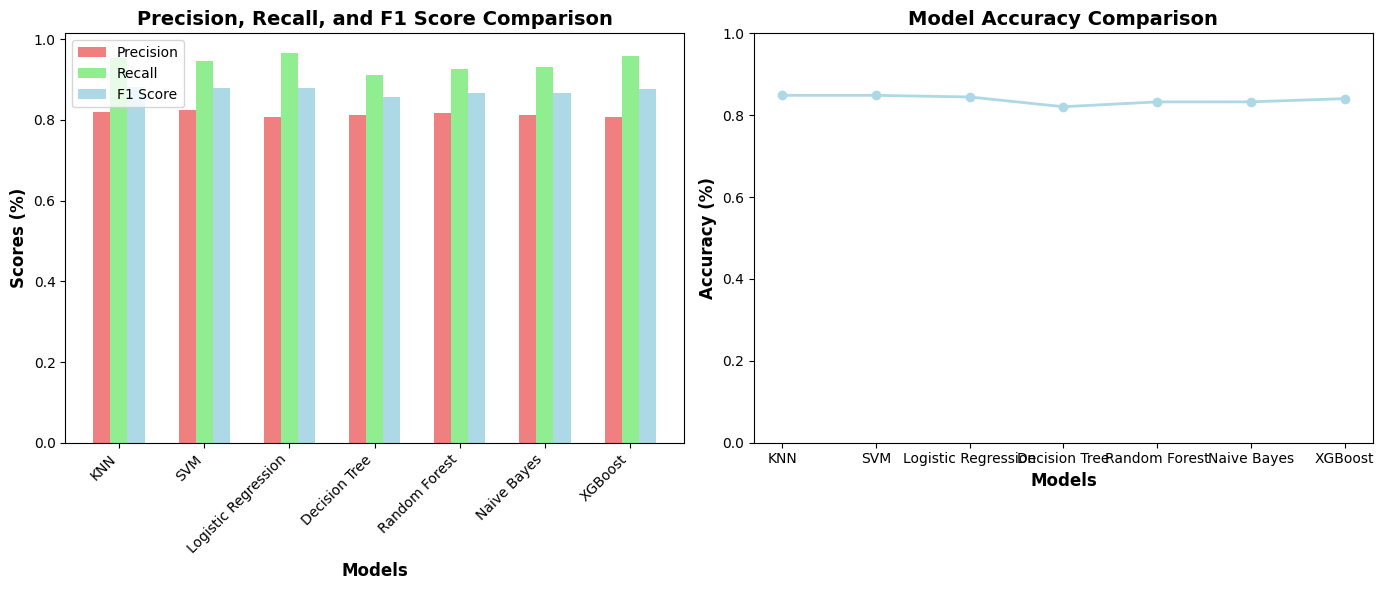

In [4]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from logger import logger 
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
output_path = '../Results/model_evaluation_results.csv' # Path where the evaluation results are saved
try:
    results_df = pd.read_csv(output_path)
    # Model Comparison Data from the CSV file
    models = results_df['Model']
    accuracy = results_df['Accuracy']
    precision = results_df['Precision']
    recall = results_df['Recall']
    f1_score = results_df['F1']
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    # Bar Graph for Precision, Recall, F1 Score
    bar_width = 0.2
    index = np.arange(len(models))
    axs[0].bar(index - bar_width, precision, bar_width, label='Precision', color='lightcoral')
    axs[0].bar(index, recall, bar_width, label='Recall', color='lightgreen')
    axs[0].bar(index + bar_width, f1_score, bar_width, label='F1 Score', color='lightblue')
    axs[0].set_xlabel('Models', fontsize=12, fontweight='bold')
    axs[0].set_ylabel('Scores (%)', fontsize=12, fontweight='bold')
    axs[0].set_title('Precision, Recall, and F1 Score Comparison', fontsize=14, fontweight='bold')
    axs[0].set_xticks(index)
    axs[0].set_xticklabels(models, rotation=45, ha='right')
    axs[0].legend()

    # Line graph for Accuracy
    axs[1].plot(models, accuracy, marker='o', label='Accuracy', color='lightblue', linestyle='-', linewidth=2, markersize=6)
    axs[1].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
    axs[1].set_xlabel('Models', fontsize=12, fontweight='bold')
    axs[1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    axs[1].set_ylim(0, 1)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    logger.error(f"File not found: {output_path}. Please check the file path.")
    print(f"Error: The file at {output_path} could not be found. Please check the file path.")
except KeyError as e:
    logger.error(f"Missing expected column in the CSV file: {e}")
    print(f"Error: Missing expected column: {e}")
except Exception as e:
    logger.error(f"An error occurred: {str(e)}")
    print("An error occurred. Please check the log for details.")
